In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.fftpack import fft, ifft

# Load data files

In [2]:
measured_file = "suspect_calibration_data/ar_cal/ar_cal_measured.csv"
true_file = "suspect_calibration_data/ar_cal/ar_cal_nist.csv"

In [3]:
measured = np.loadtxt(measured_file, skiprows=1, delimiter=',')
true = np.loadtxt(true_file, skiprows=1, delimiter=',')
print(measured.shape)
print(true.shape)

(2048, 2)
(222, 2)


In [4]:
print(true[:10])

[[242.0456   2.    ]
 [251.6789   3.    ]
 [253.4709   3.    ]
 [256.2087   5.    ]
 [289.1612   8.    ]
 [294.2893  70.    ]
 [297.905   30.    ]
 [303.3508  15.    ]
 [309.3402  15.    ]
 [324.3689   7.    ]]


# Normalize spectra

In [5]:
measured[:,1] = measured[:,1] / np.linalg.norm(measured[:,1])
true[:,1] = true[:,1] / np.linalg.norm(true[:,1])

In [6]:
print(true[:10])

[[2.42045600e+02 7.50662700e-04]
 [2.51678900e+02 1.12599405e-03]
 [2.53470900e+02 1.12599405e-03]
 [2.56208700e+02 1.87665675e-03]
 [2.89161200e+02 3.00265080e-03]
 [2.94289300e+02 2.62731945e-02]
 [2.97905000e+02 1.12599405e-02]
 [3.03350800e+02 5.62997025e-03]
 [3.09340200e+02 5.62997025e-03]
 [3.24368900e+02 2.62731945e-03]]


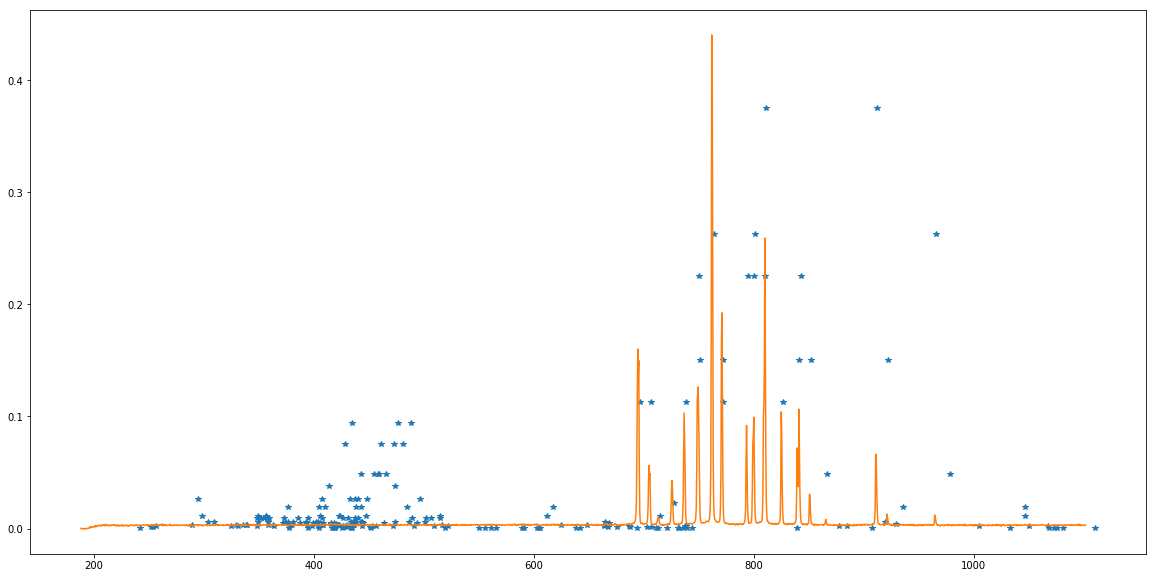

In [7]:
f = plt.figure(figsize=(20,10))
plt.plot(true[:,0], true[:,1], '*')
plt.plot(measured[:,0], measured[:,1])
plt.show()

# Peak shift?

In [8]:
shift = 0

In [9]:
smeasured = measured
smeasured[:,0] = smeasured[:,0] + 3

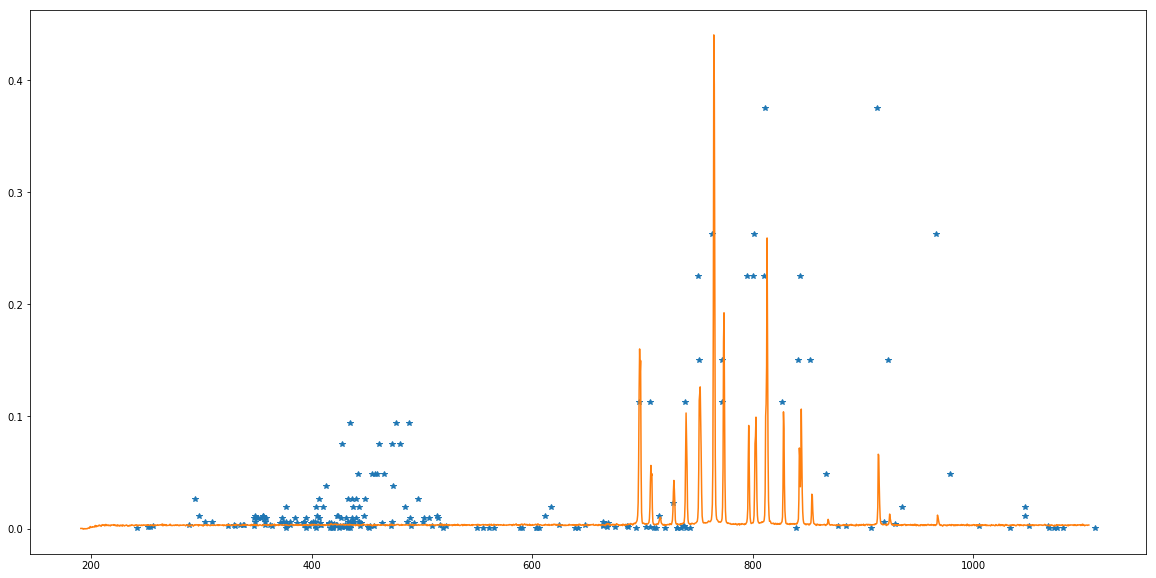

In [11]:
f = plt.figure(figsize=(20,10))
plt.plot(true[:,0], true[:,1], '*')
plt.plot(smeasured[:,0], smeasured[:,1])
#plt.xlim(850, 925)
#plt.ylim(0, 0.15)
plt.show()

So the problem here is that I need to figure out a discrete FFT of the calibration data that aligns with the discrete FFT of the desired Ar peaks.

Theory: I need to resample each of these to ensure that they each have points that align

Solution/test: Create a wavelength index that is the superset containing all wavelengths in both datasets. Fill in intensities of 0 for the Ar peaks where they don't align, linear interpolate the intensities of the measured cal sample where it needs new wavelengths.

Potential problems:
- Values from NIST that are very close but not aligned to 